In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 15,5

In [2]:
import pickle

with open('tix_df.pkl', 'rb') as f:
    tix_df = pickle.load(f)    

In [3]:
stock = tix_df[0].loc[:6,:]

In [4]:
stock

,date,trending,trendingScore,sentimentChange,volumeChange,price,change,percent,lastUpdated,extendedHoursChange,...,previousCloseDate,previousClose,dateTime,volume,lastSize,low,percentChange,high,extendedHoursPercentChange,extendedHoursDateTime
0,2020-05-31,False,-1.96306,-0.38,1.63,156.8,-0.02,-0.012,"05/29/2020, 07:54:13 PM EDT",0.36,...,2020-05-28,156.82,2020-05-29 23:54:13,8632670,4066207,153.05,-0.012,156.87,0.23,2020-05-29 23:54:13
1,2020-06-01,False,-2.63215,-1.11,6.4,154.86,-1.58,-1.013,"06/01/2020, 07:45:03 PM EDT",-0.72,...,2020-05-29,156.44,2020-06-01 23:45:03,2084341,188374,154.89,-1.013,157.55,-0.463,2020-06-01 23:45:03
2,2020-06-02,False,-1.44435,-1.22,-4.51,158.48,2.9,1.857,"06/02/2020, 07:46:41 PM EDT",0.84,...,2020-06-01,155.58,2020-06-02 23:46:41,2333605,234959,156.63,1.857,158.6,0.533,2020-06-02 23:46:41
3,2020-06-03,False,2.65165,-3.33,4.76,161.22,3.58,2.271,"06/03/2020, 07:59:59 PM EDT",0.01,...,2020-06-02,157.64,2020-06-03 23:59:59,3674275,520976,158.52,2.271,161.66,0.006,2020-06-03 23:59:59
4,2020-06-04,False,-0.585135,0,-9.09,162.55,1.34,0.831,"06/04/2020, 07:58:28 PM EDT",0,...,2020-06-03,161.21,2020-06-04 23:58:28,2880967,222546,159.18,0.831,162.58,0,2020-06-04 23:41:10
5,2020-06-05,False,-0.781025,9.29,3.33,167.47,4.92,3.026,"06/05/2020, 07:59:59 PM EDT",0.06,...,2020-06-04,162.55,2020-06-05 23:59:59,4527587,541077,165,3.026,168.35,0.036,NaN
6,2020-06-08,False,0.448485,0,2.52,166.01,-1.4,-0.838,"06/08/2020, 07:59:23 PM EDT",-0.86,...,2020-06-05,167.41,2020-06-08 23:59:23,2987595,382994,165.27,-0.838,169.54,-0.515,NaN


In [7]:
prices = np.array(stock['price'])

In [8]:
ts = (np.array(stock['trendingScore']) + np.array(stock['sentimentChange']))/2

In [9]:
log_rets = np.zeros(len(prices)-1)

for i in range(len(prices)-1):
    log_ret = np.log(prices[i+1]) - np.log(prices[i])
    log_rets[i] = log_ret
    

In [10]:
log_rets

array([-0.01244962,  0.02310692,  0.01714149,  0.00821575,  0.02981858,
       -0.0087562 ])

In [11]:
ts

array([-1.17153, -1.8710750000000003, -1.3321749999999999, -0.339175,
       -0.2925675, 4.2544875, 0.2242425], dtype=object)

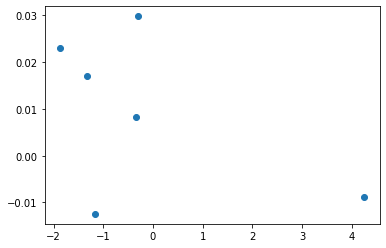

In [12]:
plt.scatter(ts[:-1], log_rets)

In [46]:
log_rets = []
all_inputs = []

avg_rets = []
avg_inputs = []

for i in range(len(tix_df)):
    data = tix_df[i].loc[:6, :]
    prices = np.array(data['price'])
    #inputs = data['price']*(np.array(data['trendingScore'])+np.array(data['sentimentChange'])+np.array(data['volumeChange']))/3
    #inputs = data['volume']*data['percentChange']*data['trendingScore']
#     inputs = data['extendedHoursPercentChange']+10*data['trendingScore']
    #inputs = data['volume']*data['trendingScore']
    inputs = data['trendingScore']
    
    for i in range(2,len(prices)):
#         log_ret = np.log(prices[i+1]) - np.log(prices[i])
#         log_rets.append(log_ret)
        log_ret = np.log(prices[i]) - np.log(prices[i-1])
#         log_ret = prices[i]/prices[i-1] - 1
        avg_rets.append(log_ret)
        
        avg_inputs.append(np.mean(inputs[i-2:i]))
        
    
#     avg_rets.append(np.mean(log_rets))
    
    for i in range(len(ts)-1):
        all_inputs.append(inputs[i])
        
#     avg_inputs.append(np.mean(inputs))

Text(0, 0.5, 'output')

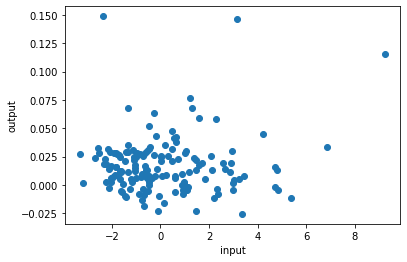

In [47]:
plt.scatter(avg_inputs, avg_rets)
plt.xlabel('input')
plt.ylabel('output')

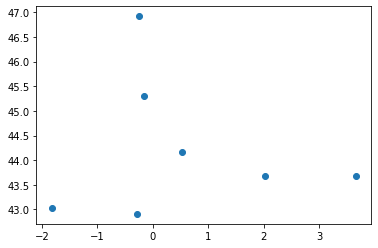

In [24]:
plt.scatter(data['trendingScore'],data['price'])